In [74]:
import pandas as pd
from tensorflow.python.keras.utils.np_utils import to_categorical





In [75]:
data=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [76]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [77]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [78]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [80]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [82]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)


In [83]:
le.classes_

array(['B', 'M'], dtype=object)

In [84]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [85]:
num_classes=2
y_train=to_categorical(y_train,num_classes=num_classes)
y_test=to_categorical(y_test,num_classes=num_classes)

In [86]:
sc = StandardScaler().set_output(transform="pandas")
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [87]:
X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.073592,-2.111067,1.249050,0.970205,1.602747,3.207728,2.587691,2.472908,2.120997,2.299336,...,1.848887,-1.337550,2.277383,1.984065,1.289633,2.511131,2.046136,2.219139,2.577261,1.895621
1,1.811308,-0.299023,1.668217,1.905712,-0.856556,-0.489855,-0.055542,0.506578,-0.039871,-0.854207,...,1.768140,-0.331205,1.505950,1.872478,-0.380494,-0.440041,-0.174098,1.030096,-0.296278,0.271962
2,1.559684,0.554281,1.547862,1.551658,0.959792,1.020326,1.314427,1.982156,0.875027,-0.379172,...,1.474139,0.019691,1.317577,1.434987,0.515460,1.025687,0.811623,1.883691,1.043465,0.193713
3,-0.805010,0.340955,-0.627656,-0.799774,3.363566,3.324810,1.859934,1.401944,2.754662,4.979274,...,-0.318856,0.180243,-0.285988,-0.586504,3.359895,3.747666,1.928114,2.100834,5.739551,4.835380
4,1.731246,-1.140066,1.759521,1.822236,0.280305,0.516684,1.321865,1.378940,-0.050551,-0.545148,...,1.260884,-1.446792,1.308607,1.197644,0.211009,-0.326676,0.573690,0.678175,-0.895514,-0.393152


Train:0.978, Test:0.974


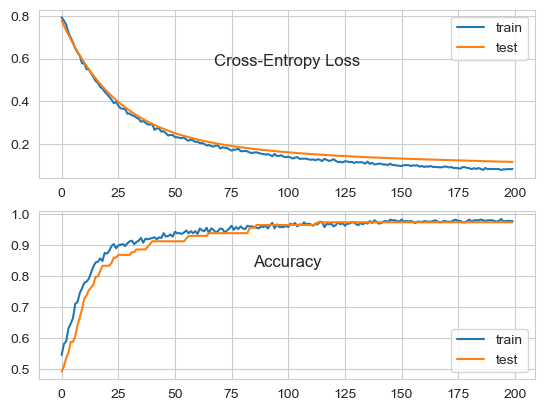

In [88]:
model=keras.Sequential()
model.add(keras.Input(shape=(30,))),
model.add(keras.layers.Dense(50, activation='relu',kernel_initializer='he_uniform')),
model.add(keras.layers.Dropout(0.1)),
model.add(keras.layers.Dense(2,activation='sigmoid')),
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train, validation_data=(X_test_scaled,y_test), epochs=200, verbose=0,batch_size=len(X_train_scaled))
_, train_acc = model.evaluate(X_train_scaled,y_train,verbose=0)
_, test_acc = model.evaluate(X_test_scaled,y_test,verbose=0)
print('Train:%.3f, Test:%.3f' % (train_acc, test_acc))
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()





In [89]:
model.evaluate(X_test_scaled,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9832 - loss: 0.1183


[0.1152568981051445, 0.9736841917037964]